

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/akshayrb22/playing-with-data/blob/master/supervised_learning/support_vector_machine/svm.ipynb)


In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Reading the dataset from the mounted drive
dataframe = pd.read_csv("pima-indians-diabetes.csv") 

In [3]:
#Previewing data
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Showing the number of values that are null (there aren't any)
dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

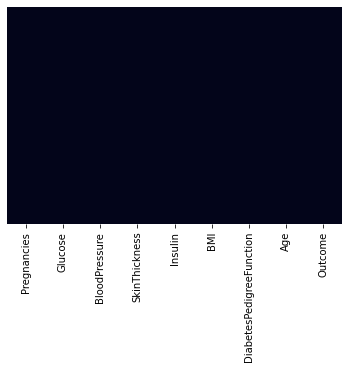

In [5]:
#Heatmap showing the null values (there aren't any)
sns.heatmap(dataframe.isnull(),yticklabels=False,cbar=False)

In [6]:
#Shape of dataset (rows,columns)
dataframe.shape

(768, 9)

In [7]:
#Data types of dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#Number of diabetic patients(outcome = 1) and non diabetic (outcome = 0)
dataframe.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [9]:
###Cleaning the data

In [10]:
#Printing the minium values of datasets, thus checking for 0 values
print("Pregnancies = ", dataframe['Pregnancies'].min())
print("Glucose = ", dataframe['Glucose'].min())
print("BloodPressure = ", dataframe['BloodPressure'].min())
print("SkinThickness = ", dataframe['SkinThickness'].min())
print("Insulin = ", dataframe['Insulin'].min())
print("BMI = ", dataframe['BMI'].min())
print("DiabetesPedigreeFunction = ", dataframe['DiabetesPedigreeFunction'].min())
print("Age = ", dataframe['Age'].min())
print("Outcome = ", dataframe['Outcome'].min())

Pregnancies =  0
Glucose =  0
BloodPressure =  0
SkinThickness =  0
Insulin =  0
BMI =  0.0
DiabetesPedigreeFunction =  0.078
Age =  21
Outcome =  0


In [11]:
#Replacing 0 values with median not mean because the dataset is asymmetrical, except pregnancies 
dataframe['Glucose'] = dataframe['Glucose'].replace(to_replace=0,value=dataframe['Glucose'].median())
dataframe['BloodPressure'] = dataframe['BloodPressure'].replace(to_replace=0,value=dataframe['BloodPressure'].median())
dataframe['SkinThickness'] = dataframe['SkinThickness'].replace(to_replace=0,value=dataframe['SkinThickness'].median())
dataframe['Insulin'] = dataframe['Insulin'].replace(to_replace=0,value=dataframe['Insulin'].median())
dataframe['BMI'] = dataframe['BMI'].replace(to_replace=0,value=dataframe['BMI'].median())

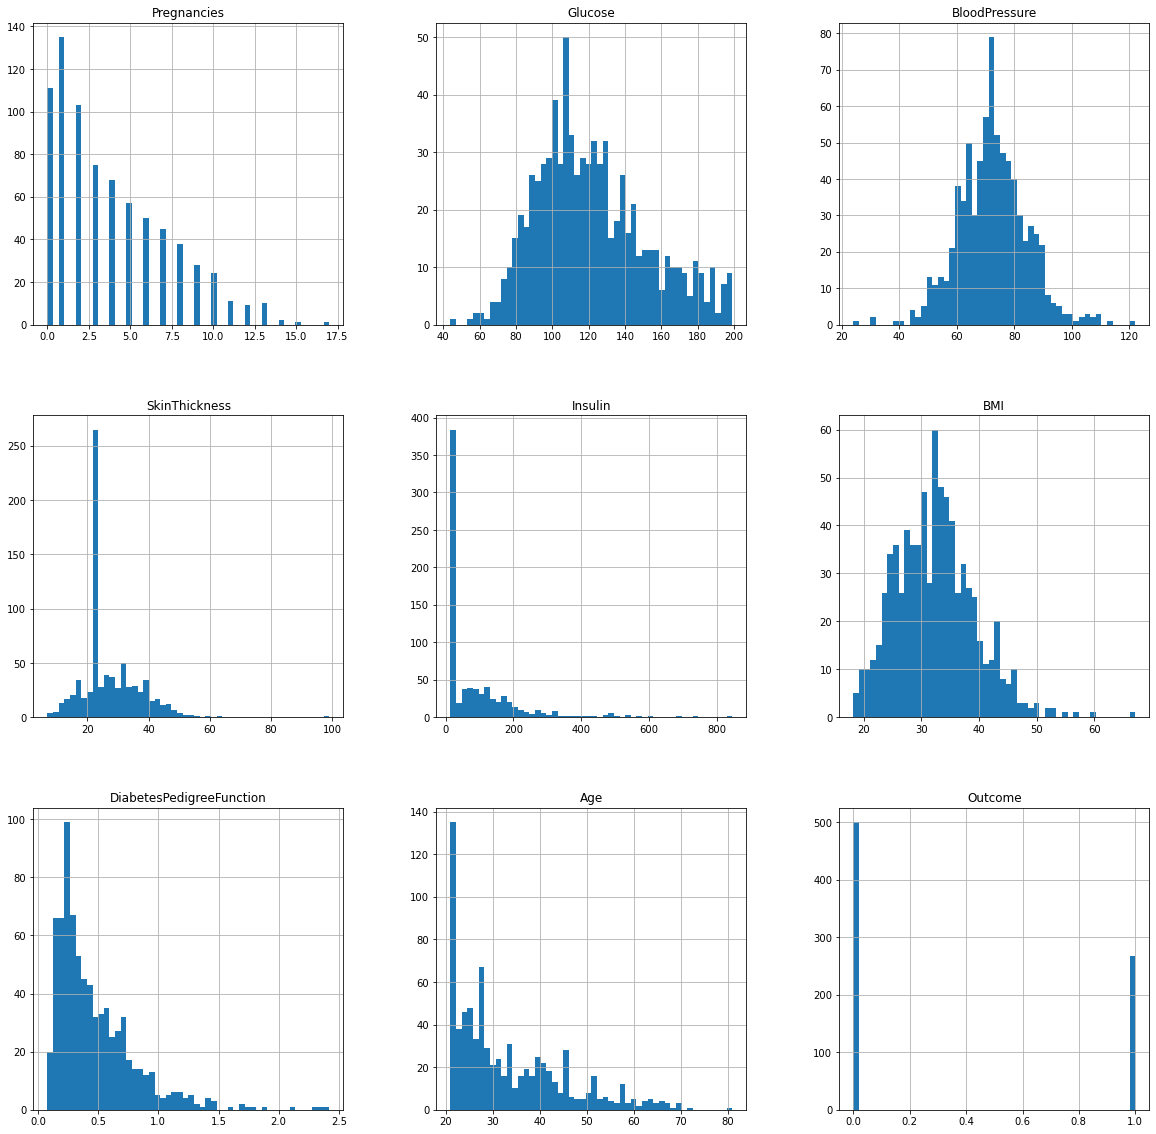

In [12]:
###Visualizing the data
dataframe.hist(bins=50, figsize=(20, 20))
plt.show()

In [13]:
#Correlation of data
correlation = dataframe.corr()

<AxesSubplot:>

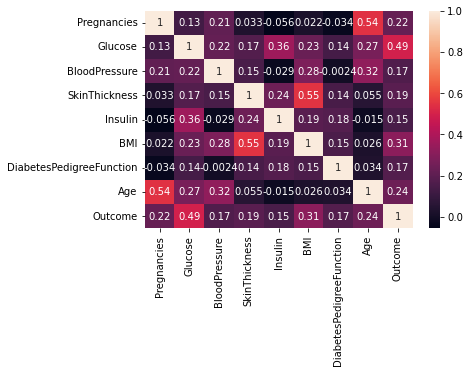

In [14]:
#Correlation of data heatmap
sns.heatmap(correlation,annot=True)

In [15]:
####Feature Prepapration

In [16]:
#Colums of the dataset
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
#Saving the outcome to a Class label
classes = dataframe['Outcome'].tolist()

dataframe['Class'] = classes  
dataframe = dataframe.drop([ 'Outcome'], axis=1)  
dataframe.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [18]:
#Creating new dataframes to show an example of the dataset plot
dataframe1 = dataframe[dataframe.Class == 0]
dataframe2 = dataframe[dataframe.Class == 1]

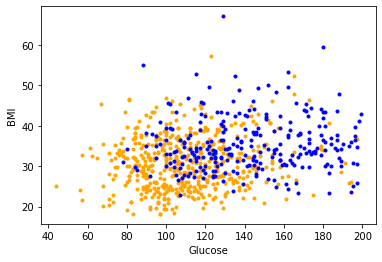

In [19]:
#Using the created dataframes to show the Glucose and BMI values
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.scatter(dataframe1['Glucose'], dataframe1['BMI'], color='orange', marker='.')
plt.scatter(dataframe2['Glucose'], dataframe2['BMI'], color='blue', marker='.')

In [20]:
#Dropping the class column for the training label set
X_labels = dataframe.drop(['Class'], axis='columns')
X_labels.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33


In [21]:
#Importing scaler
from sklearn.preprocessing import MinMaxScaler as Scaler

In [22]:
#Scaling the dataframe
scaler = Scaler()
X_df = scaler.fit_transform(X_labels)

In [23]:
#Shape of the scaled data
X_df.shape

(768, 8)

In [24]:
#Labels for the scaled data
labels = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

In [25]:
#Putting the labels to the scaled dataframe
X_df = pd.DataFrame(X_df,columns=labels[:])


In [26]:
#Dataset preview
X_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


In [27]:
#Creating the dependent dataframe
y_labels = dataframe.Class

In [28]:
#Splitting the data into test, train dataframes
X_train, X_test, y_train, y_test = train_test_split(X_df, y_labels,train_size=0.8, test_size=0.2)

In [29]:
#Train and test dependant data count
print(len(X_train))
print(len(X_test))

614
154


In [30]:
#Creating the SVM model
model = SVC(C=1,gamma = 0.1, kernel="rbf",probability=True, random_state=0)

In [31]:
#Fitting the train data for the model
model.fit(X_train, y_train)

SVC(C=1, gamma=0.1, probability=True, random_state=0)

In [32]:
#Showing the predicted values for the X test 
pred = model.predict(X_test)
print(pred)

[1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 1 0 1 0]


In [33]:
#Storing the score precentage of the model 
percent= model.score(X_test, y_test)

In [34]:
#Printing the accuracy 
print(f"Accuracy = {percent*100} %")

Accuracy = 83.11688311688312 %


In [35]:
#Printing the confusion matrix
from sklearn.metrics import confusion_matrix
result = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(result)

Confusion Matrix
[[96  6]
 [20 32]]


<AxesSubplot:>

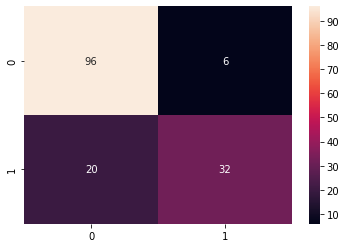

In [36]:
#Heatmap for the confusion matrix
sns.heatmap(pd.DataFrame(result), annot=True)

In [37]:
#Classification report for the dependant test set and the predicted values
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       102
           1       0.84      0.62      0.71        52

    accuracy                           0.83       154
   macro avg       0.83      0.78      0.80       154
weighted avg       0.83      0.83      0.82       154



In [38]:
#Importing shap to interpret the model
import shap

#JS initialization for plotting
shap.initjs()

In [39]:
#Explainer to explain the values for the model and train set
explain = shap.KernelExplainer(model.predict_proba, X_train)

Using 614 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [40]:
#Using explain to explain test values
values = explain.shap_values(X_test)

  0%|          | 0/154 [00:00<?, ?it/s]

In [41]:
#Plotting the values
shap.force_plot(explain.expected_value[0], values[0], X_test)

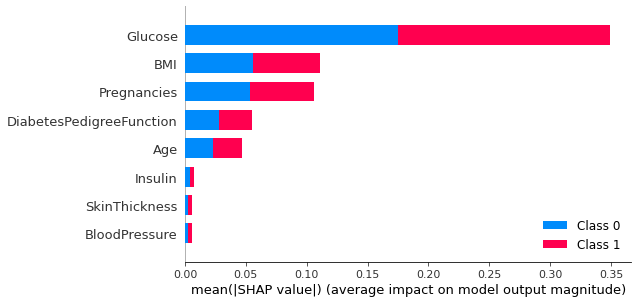

In [42]:
#Summary of all features
shap.summary_plot(values,X_test)

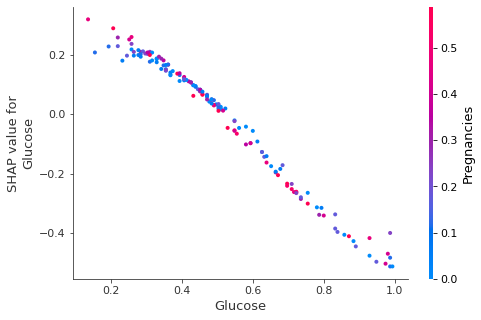

In [43]:
#Concentration of Glucose dependancy plot
shap.dependence_plot(1,values[0], X_test)

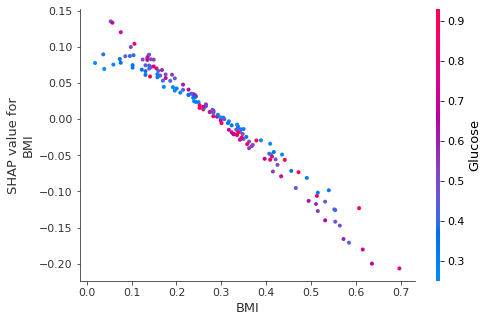

In [44]:
#Concentration of BMI dependancy plot
shap.dependence_plot(5,values[0], X_test)